In [1]:
import pandas as pd
import numpy as np
import sys
import os
from datetime import datetime
import opendp.prelude as dp

dp.enable_features("contrib", "floating-point", "honest-but-curious")
# Append the 'src' directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from DP_epidemiology.viz import create_hotspot_dash_app, create_mobility_dash_app, create_pandemic_adherence_dash_app, create_contact_matrix_dash_app, create_mobility_validation_dash_app
from DP_epidemiology.mobility_analyzer import mobility_validation_with_google_mobility

In [2]:
path = "C:\\Users\kshub\\OneDrive\\Documents\\PET_phase_2\\Technical_Phase_Data\\technical_phase_data.csv"
df_tran = pd.read_csv(path)

In [3]:
import pandas as pd

# Define the path to the CSV file
file_path = "C:\\Users\\kshub\\OneDrive\\Documents\\PET_phase_2\\Global_Mobility_Report (1).csv"

# Initialize an empty list to store the chunks
chunks = []

# Read the CSV file in chunks
chunk_size = 10000  # Adjust the chunk size as needed
for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df_mobility = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the DataFrame
df_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
df_mobility = pd.read_csv("C:\\Users\\kshub\\OneDrive\\Documents\\PET_phase_2\\Global_Mobility_Report (1).csv", low_memory=False)


Scipy computed Pearson r: 0.2726605353538447 and p-value: 0.06675963402694846


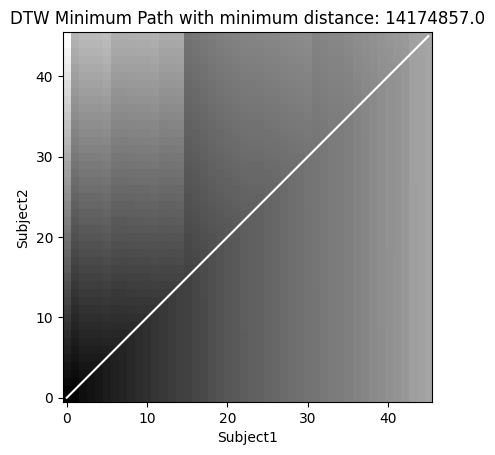

In [4]:
mobility_validation_with_google_mobility(df_tran,df_mobility,datetime(2020, 2, 15),datetime(2020, 12, 31),"Bogota","retail_and_recreation",1.0)

In [5]:
app= create_mobility_validation_dash_app(df_tran,df_mobility)
app.run_server(debug=True)

In [7]:
app=create_hotspot_dash_app(df_tran)
app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File c:\Users\kshub\OneDrive\Documents\PET_phase_2\PETs_for_Public_Health_Challenge\src\DP_epidemiology\viz.py:76, in create_hotspot_dash_app.<locals>.update_graph(
    start_date=datetime.datetime(2019, 1, 1, 0, 0),
    end_date=datetime.datetime(2019, 12, 31, 0, 0),
    epsilon=1,
    city='Medellin'
)
     73 filtered_df = get_coordinates(output)
     75 # Plot using Plotly Express
---> 76 fig = px.scatter_geo(
        px = <module 'plotly.express' from 'c:\\Users\\kshub\\OneDrive\\Documents\\PET_phase_2\\.venv\\lib\\site-packages\\plotly\\express\\__init__.py'>
        filtered_df =     nb_transactions merch_postal_code  Latitude  Longitude
0            306566            500001  6.389072 -74.596536
1            296614            500002  5.523995 -76.536749
2            342304            500003  5.982925 -75.812286
3            30723

In [8]:
app=create_mobility_dash_app(df_tran)
app.run_server(debug=True)

In [10]:
app=create_pandemic_adherence_dash_app(df_tran)
app.run_server(debug=True)

In [10]:
app=create_contact_matrix_dash_app(df)
app.run_server(debug=True)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File c:\Users\kshub\OneDrive\Documents\PET_phase_2\PETs_for_Public_Health_Challenge\src\DP_epidemiology\viz.py:287, in create_contact_matrix_dash_app.<locals>.update_contact_matrix(
    start_date=datetime.datetime(2019, 1, 1, 0, 0),
    end_date=datetime.datetime(2019, 12, 31, 0, 0),
    city='Medellin',
    epsilon=1
)
    284 end_date = datetime.strptime(end_date, '%Y-%m-%d')
    286 # Get age group count map
--> 287 age_group_count_map = get_age_group_count_map(df, start_date, end_date, city, epsilon)
        start_date = datetime.datetime(2019, 1, 1, 0, 0)
        end_date = datetime.datetime(2019, 12, 31, 0, 0)
        df =             ID        date               merch_category  merch_postal_code  \
0            1  2019-01-01  Grocery Stores/Supermarkets            8700000   
1            1  2019-01-01  Grocery Stores/Supermarket